<a href="https://colab.research.google.com/github/Codersuraj13/weather_prrdiction/blob/main/MLmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('/content/drive/MyDrive/seattle-weather.csv')

In [9]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [5]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [17]:
# Define features (X) and target (y)
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['weather']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Convert y to categorical (one-hot encoding)
y = to_categorical(y)

# Scale the feature variables
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
print(X_train)

[[-0.45364986 -1.47525865 -2.27725991  1.71071279]
 [ 2.31667892 -0.3455831   0.35154932  2.12815262]
 [ 2.36160317 -0.57696243 -0.42514431 -0.72435286]
 ...
 [-0.37877611 -0.11420378 -0.20607688 -0.79392617]
 [-0.45364986 -1.47525865 -1.83912504  0.11052679]
 [-0.45364986 -1.25748987 -0.98277052 -0.93307278]]


In [24]:
print(y_train)

[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]]


In [26]:
# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))  # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))  # Output layer for multi-class classification


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [28]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,  # Adjust epochs based on model performance
                    batch_size=32,
                    validation_split=0.2,  # Use 20% of training data for validation
                    verbose=1)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4410 - loss: 1.4556 - val_accuracy: 0.6410 - val_loss: 1.0741
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6843 - loss: 1.0374 - val_accuracy: 0.7308 - val_loss: 0.8872
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6945 - loss: 0.9027 - val_accuracy: 0.7521 - val_loss: 0.8108
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7271 - loss: 0.8322 - val_accuracy: 0.7778 - val_loss: 0.7391
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7226 - loss: 0.8380 - val_accuracy: 0.7607 - val_loss: 0.7129
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7226 - loss: 0.8171 - val_accuracy: 0.7650 - val_loss: 0.6854
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7879 - loss: 0.6723 - val_accuracy: 0.7650 - val_loss: 0.6648
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7624 - loss: 0.7091 - val_accuracy: 0.7821 - val_loss

In [29]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.2f}')


Test accuracy: 0.83


In [30]:
# Predict on test set
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Decode to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)
y_true_labels = label_encoder.inverse_transform(y_true)

# Example of displaying first 5 predictions
print("Predicted labels:", y_pred_labels[:5])
print("True labels:", y_true_labels[:5])



10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted labels: ['sun' 'rain' 'sun' 'sun' 'rain']
True labels: ['sun' 'rain' 'rain' 'sun' 'rain']


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion Matrix:
 [[  0   0   0   0   9]
 [  0   0   0   0  25]
 [  0   0 108   3   9]
 [  0   0   5   3   0]
 [  0   0   0   0 131]]


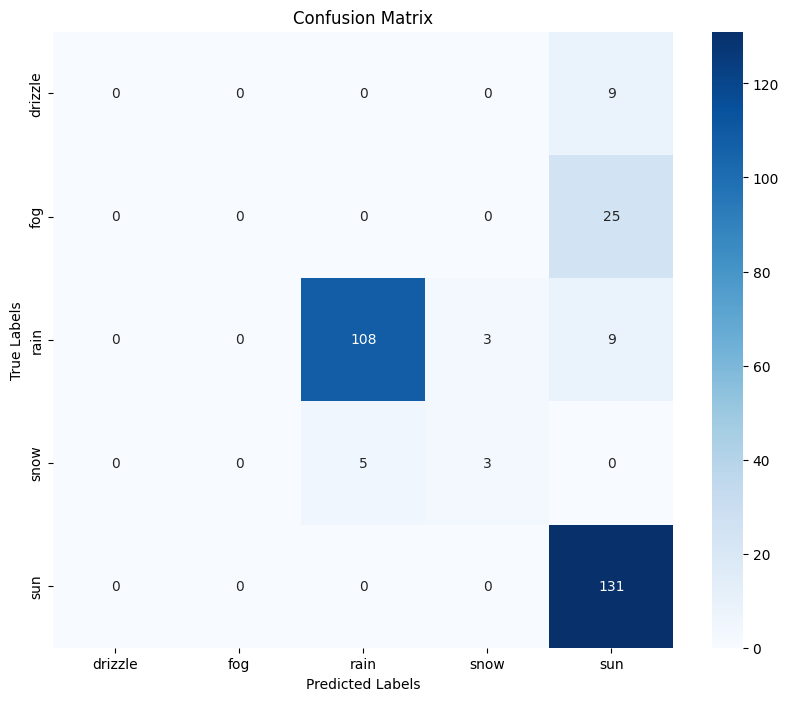

In [32]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)  # True labels

# Build the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# (Optional) Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [31]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print(classification_report(y_true_labels, y_pred_labels))

# Confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
print("Confusion Matrix:\n", conf_matrix)


              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         9
         fog       0.00      0.00      0.00        25
        rain       0.96      0.90      0.93       120
        snow       0.50      0.38      0.43         8
         sun       0.75      1.00      0.86       131

    accuracy                           0.83       293
   macro avg       0.44      0.45      0.44       293
weighted avg       0.74      0.83      0.78       293

Confusion Matrix:
 [[  0   0   0   0   9]
 [  0   0   0   0  25]
 [  0   0 108   3   9]
 [  0   0   5   3   0]
 [  0   0   0   0 131]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
!pip install joblib


In [34]:
import joblib

# Save the trained model to a file (this will create a .pkl file)
joblib.dump(model, 'weather_model.pkl')
print("Model saved as weather_model.pkl")


Model saved as weather_model.pkl
